In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import nltk

In [19]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\coco\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [2]:
data = pd.read_csv('./ukiyo-e_crawler/meta_data/ukiyo-e_artworks_details.csv')
data.shape

(177985, 8)

In [3]:
data.describe()

,Image URL,Artist,Title,Date,Details,Source,Description,Similar Prints
count,177741,177390,168646,151068,166926,177390,82648,177985
unique,177167,153,108133,6497,164733,27,52762,127638
top,https://data.ukiyo-e.org/metro/scaled/nashi.jpg,Utagawa Kunisada,−,"Japanese, Edo period",http://metro.tokyo.opac.jp/tml/tpic/cgi-bin/de...,http://enpaku.waseda.ac.jp/db/enpakunishik/,役者絵,[]
freq,98,37862,2341,7624,98,42321,1355,47861


In [4]:
print(data.columns)

Index(['Image URL', 'Artist', 'Title', 'Date', 'Details', 'Source',
       'Description', 'Similar Prints'],
      dtype='object')


In [5]:
# get the number of non-null values in description column
data['Description'].notnull().sum()

82648

In [6]:
# get the length of the description
data['Description_length'] = data['Description'].apply(lambda x: len(str(x)))
data['Description_length'].describe()

count    177985.000000
mean         70.501739
std         181.497129
min           1.000000
25%           3.000000
50%           3.000000
75%          57.000000
max        6321.000000
Name: Description_length, dtype: float64

In [7]:
# get how many descriotions are lager than 50 characters
len(data[data['Description_length'] > 50])

46867

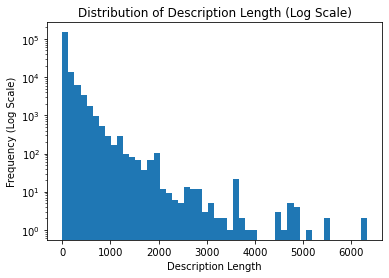

In [8]:
# create a histogram of description length in log scale
plt.hist(data['Description_length'], bins=50, log=True)

# set plot title and labels
plt.title('Distribution of Description Length (Log Scale)')
plt.xlabel('Description Length')
plt.ylabel('Frequency (Log Scale)')

# display the plot
plt.show()

In [13]:
# count the unique words in description

all_strings = ' '.join(data['Description'].dropna().values)
# remove the non-english characters
all_strings = all_strings.encode('ascii', 'ignore').decode('ascii')

words = all_strings.split()
word_counts = Counter(words)


len(word_counts)

99244

In [14]:
# get the top 20 words
top_20_words = word_counts.most_common(20)
top_20_words

[('the', 80190),
 ('of', 60189),
 ('in', 39528),
 ('and', 39071),
 ('a', 37565),
 ('is', 20860),
 ('on', 16381),
 ('by', 15739),
 ('with', 15245),
 ('The', 15240),
 ('to', 14937),
 ('from', 12965),
 ('x', 12864),
 ('at', 11247),
 ('print', 10792),
 ('for', 8935),
 ('Woodblock', 8283),
 ('as', 7853),
 ('no', 7322),
 ('A', 7242)]

In [20]:
# initialize the part-of-speech tagger
tagger = nltk.pos_tag

# extract the nouns from the counter
noun_dict = {}
for word, count in word_counts.items():
    pos = tagger([word])[0][1]
    if pos.startswith('N'):  # check if the part-of-speech tag indicates a noun
        noun_dict[word] = count

print(len(noun_dict))

78161


In [21]:
# get the top 20 nouns
top_20_nouns = sorted(noun_dict.items(), key=lambda x: x[1], reverse=True)[:20]
top_20_nouns

[('x', 12864),
 ('print', 10792),
 ('Woodblock', 8283),
 ('series', 6962),
 ('woodblock', 6901),
 ('cm', 6791),
 ('print.', 4842),
 ('seal', 4734),
 ('inches', 4179),
 ('Color', 3834),
 ('prints', 3601),
 ('=', 3263),
 ('print,', 3196),
 ('Print', 3002),
 ('left', 2990),
 ('oban', 2913),
 ('right', 2674),
 ('Artist:', 2578),
 ('Fine', 2531),
 ('Title', 2502)]